<a href="https://colab.research.google.com/github/ashwinram472/S-P-500-TimeSeries/blob/master/SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!cp gdrive/My\ Drive/Data/Projects/SP500/all_stocks_5yr.csv .

In [0]:
import numpy as np
import pandas as pd



In [0]:
data = pd.read_csv("all_stocks_5yr.csv")

In [9]:
print(data.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [10]:
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
apple = data.loc[data['Name']=='AAPL']
apple.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [0]:
apple = apple.drop(apple.loc[apple['volume'].isnull()].index)

In [0]:
apple = apple.drop(apple.loc[apple['open'].isnull()].index)

In [16]:
apple.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


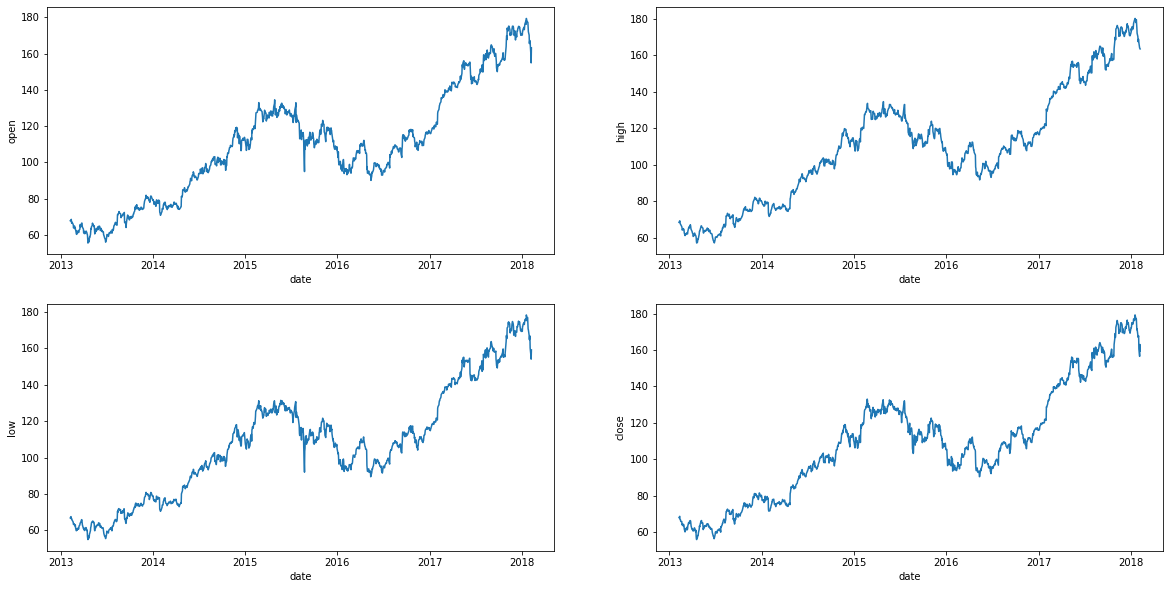

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1 = sns.lineplot(x = 'date', y = 'open' , markers = True ,dashes = False , data = apple)


ax1 = fig.add_subplot(222)
ax1 = sns.lineplot(x = 'date', y = 'high' , markers = True ,dashes = False , data = apple)


ax1 = fig.add_subplot(223)
ax1 = sns.lineplot(x = 'date', y = 'low' , markers = True ,dashes = False , data = apple)


ax1 = fig.add_subplot(224)
ax1 = sns.lineplot(x = 'date', y = 'close' , markers = True ,dashes = False , data = apple)

In [0]:
apple_cols = apple[['date','open','high','low','close']]
apple_cols = apple_cols.set_index('date')

In [19]:
apple_cols.dtypes

open     float64
high     float64
low      float64
close    float64
dtype: object

In [20]:
rolmean = apple_cols.rolling(window = 12).mean()
rolstd = apple_cols.rolling(window = 12).std()

print(rolmean,rolstd)

                  open        high         low       close
date                                                      
2013-02-08         NaN         NaN         NaN         NaN
2013-02-11         NaN         NaN         NaN         NaN
2013-02-12         NaN         NaN         NaN         NaN
2013-02-13         NaN         NaN         NaN         NaN
2013-02-14         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...
2018-02-01  173.517083  174.582642  171.914300  173.153333
2018-02-02  172.671250  173.545142  170.666800  171.603333
2018-02-05  170.982083  172.193475  168.812633  169.705833
2018-02-06  169.000417  170.871808  166.861800  168.420000
2018-02-07  167.815833  169.673475  165.400708  166.965000

[1259 rows x 4 columns]                 open      high       low     close
date                                              
2013-02-08       NaN       NaN       NaN       NaN
2013-02-11       NaN       NaN       NaN       NaN
2013

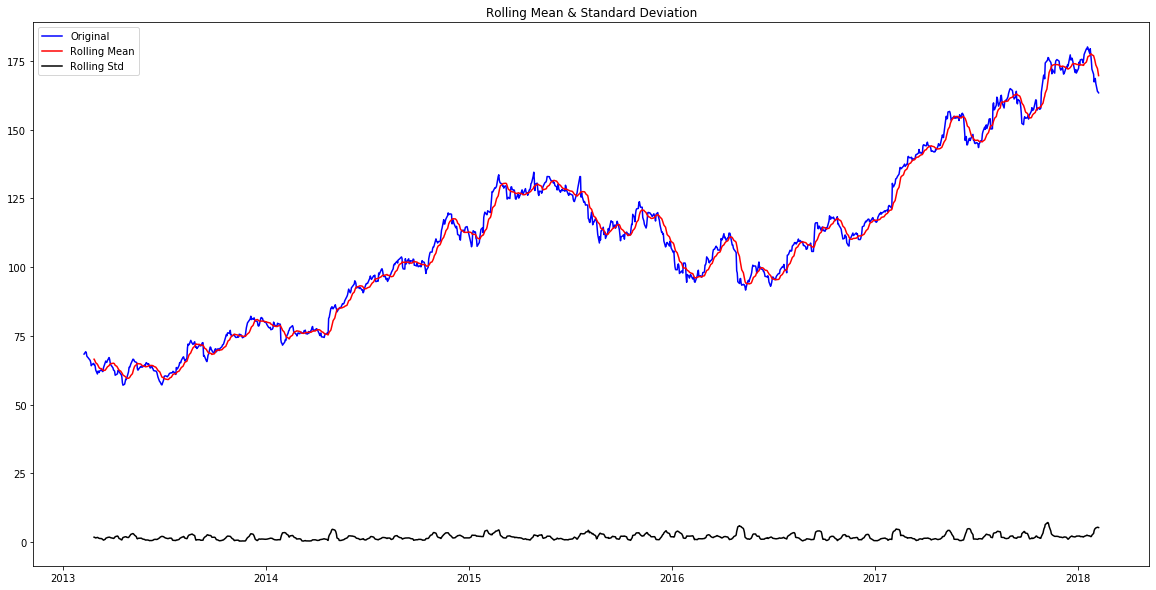

In [21]:
orig = plt.plot(apple_cols['high'] , color = 'blue', label = 'Original')
mean = plt.plot(rolmean['high'], color= 'red', label = 'Rolling Mean')
std = plt.plot(rolstd['high'], color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title("Rolling Mean & Standard Deviation")
plt.show(block = False)

In [22]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
print('results of Dicke Fuller test:')
dftest = adfuller(apple_cols['high'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Numeber of Observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)

results of Dicke Fuller test:
Test Statistic                    -0.465605
p-value                            0.898556
#Lags Used                         2.000000
Numeber of Observations used    1256.000000
Critical Value (1%)               -3.435567
Critical Value (5%)               -2.863844
Critical Value (10%)              -2.567997
dtype: float64


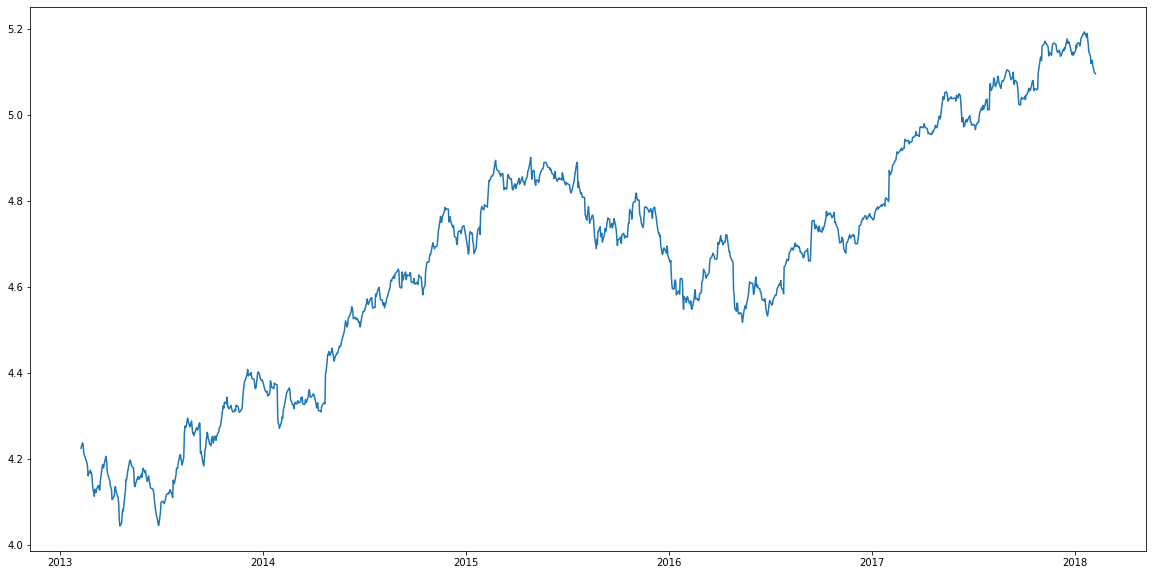

In [23]:
apple_cols_high = apple_cols[['high']]
apple_cols_high_logScale = np.log(apple_cols_high)
plt.plot(apple_cols_high_logScale)

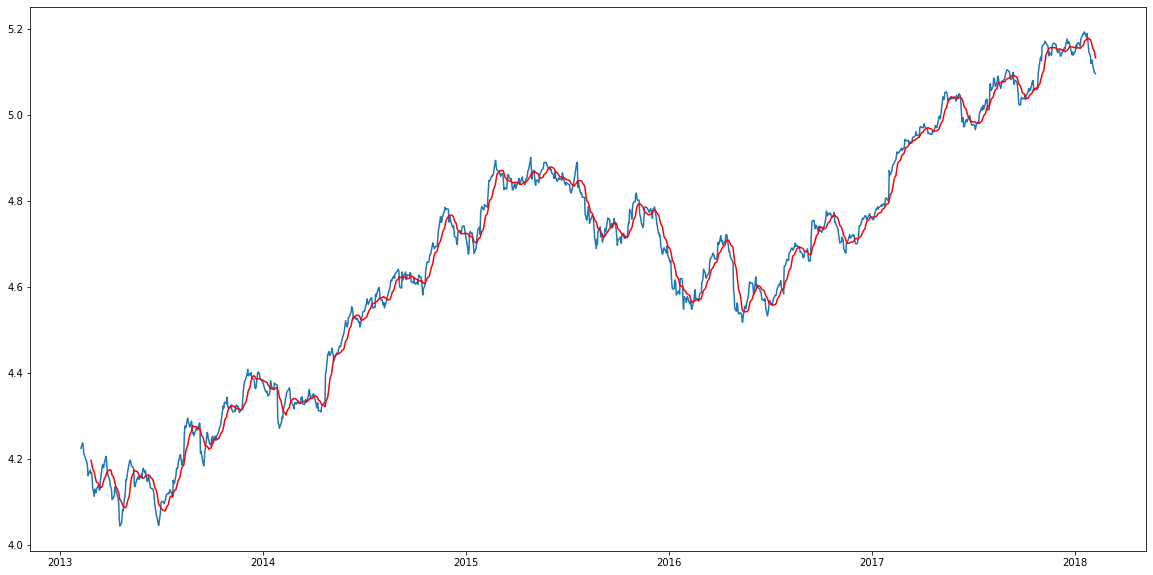

In [24]:
movingAverage = apple_cols_high_logScale.rolling(window = 12).mean()
movingSTD = apple_cols_high_logScale.rolling(window = 12).std()
plt.plot(apple_cols_high_logScale)
plt.plot(movingAverage, color= 'red')

In [25]:
datasetLogScaleMinusMovingAverage = apple_cols_high_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

,high
date,
2013-02-08,NaN
2013-02-11,NaN
2013-02-12,NaN
2013-02-13,NaN
2013-02-14,NaN


In [26]:
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head()

,high
date,
2013-02-26,-0.030717
2013-02-27,-0.024004
2013-02-28,-0.027529
2013-03-01,-0.041393
2013-03-04,-0.056028


In [0]:
def test_stationarity(timeseries):
    timeseries.dropna(inplace = True)
    
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['high'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

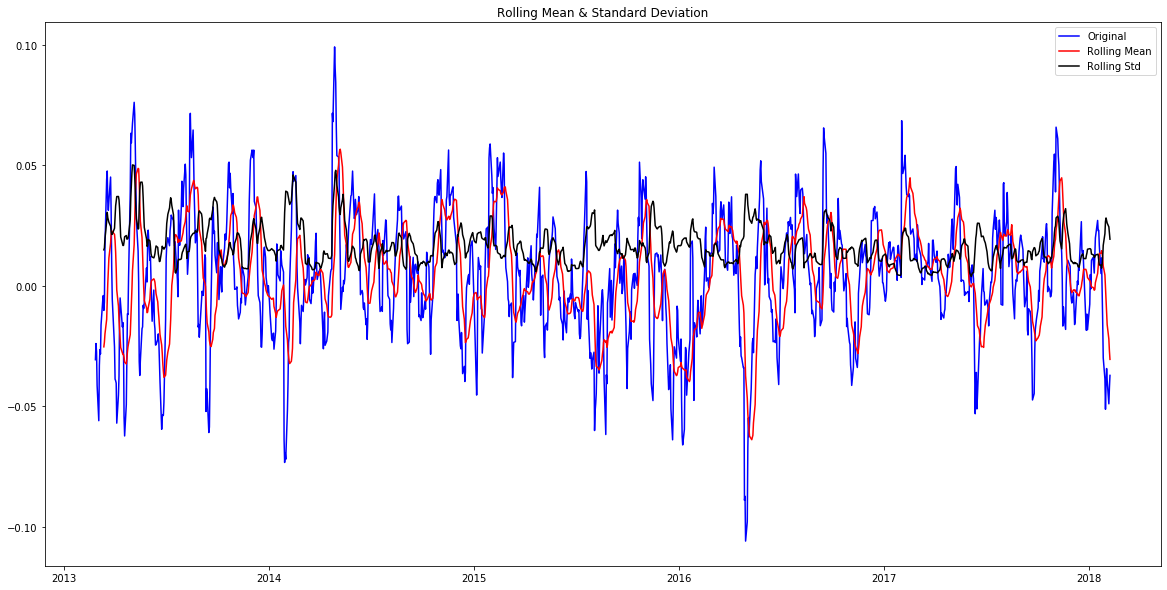

Results of Dickey Fuller Test:
Test Statistic                -1.041338e+01
p-value                        1.780118e-18
#Lags Used                     5.000000e+00
Number of Observations Used    1.242000e+03
Critical Value (1%)           -3.435626e+00
Critical Value (5%)           -2.863870e+00
Critical Value (10%)          -2.568010e+00
dtype: float64


In [28]:
test_stationarity(datasetLogScaleMinusMovingAverage)

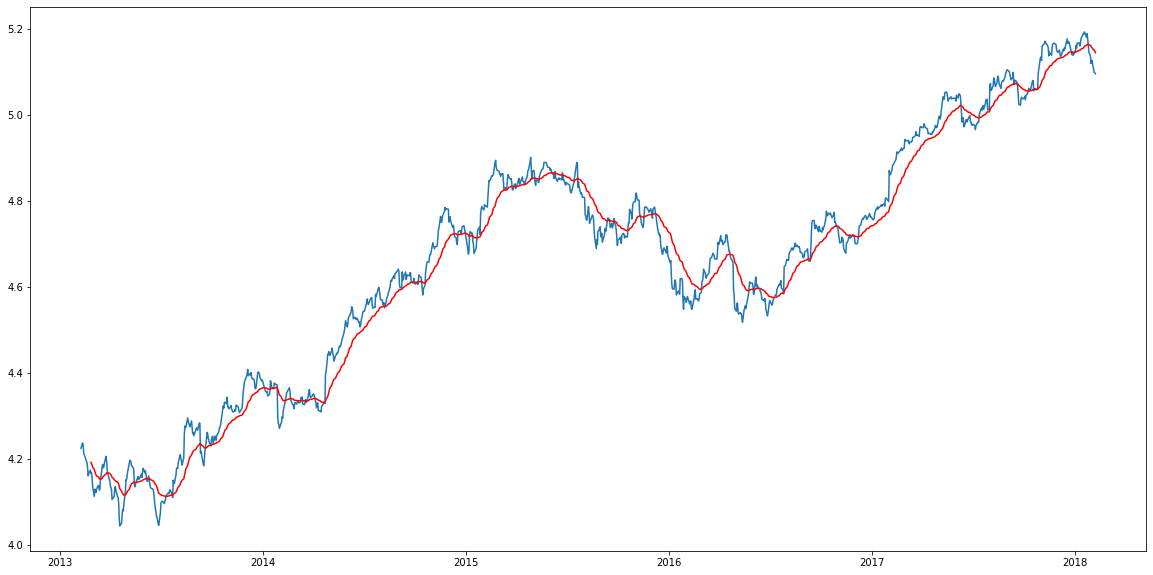

In [29]:
exponentialDecayWeightedAverage = apple_cols_high_logScale.ewm(halflife = 12  ,min_periods= 12 , adjust = True).mean()
plt.plot(apple_cols_high_logScale)
plt.plot(exponentialDecayWeightedAverage , color= 'red')

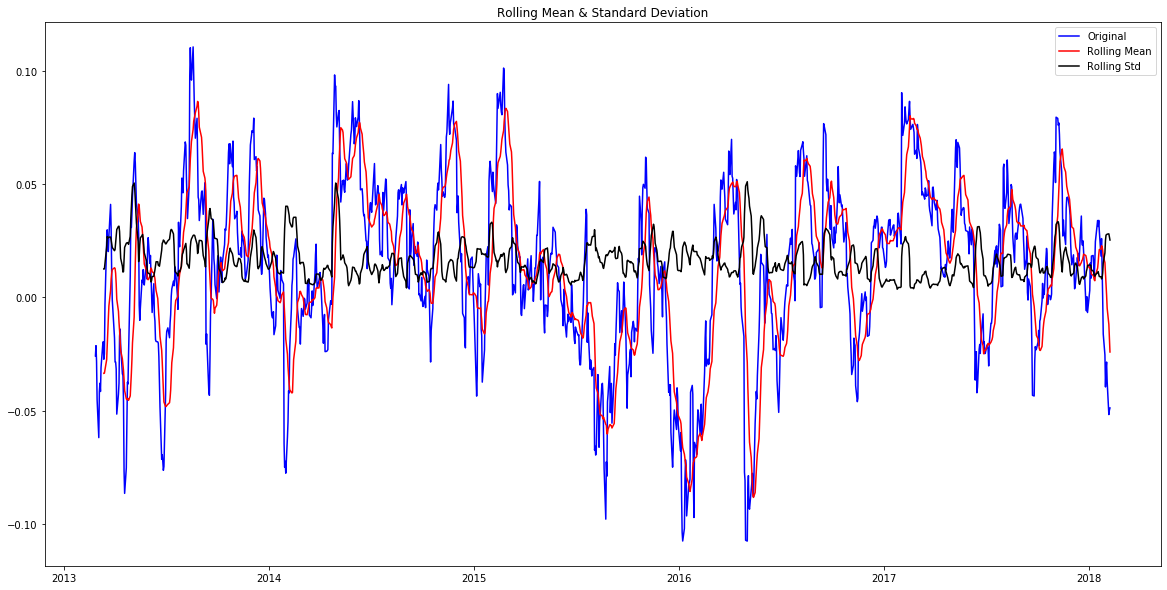

Results of Dickey Fuller Test:
Test Statistic                -6.247768e+00
p-value                        4.531658e-08
#Lags Used                     1.000000e+00
Number of Observations Used    1.246000e+03
Critical Value (1%)           -3.435609e+00
Critical Value (5%)           -2.863862e+00
Critical Value (10%)          -2.568006e+00
dtype: float64


In [30]:
datasetLogScaleMinusExponentialMovingAverage = apple_cols_high_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

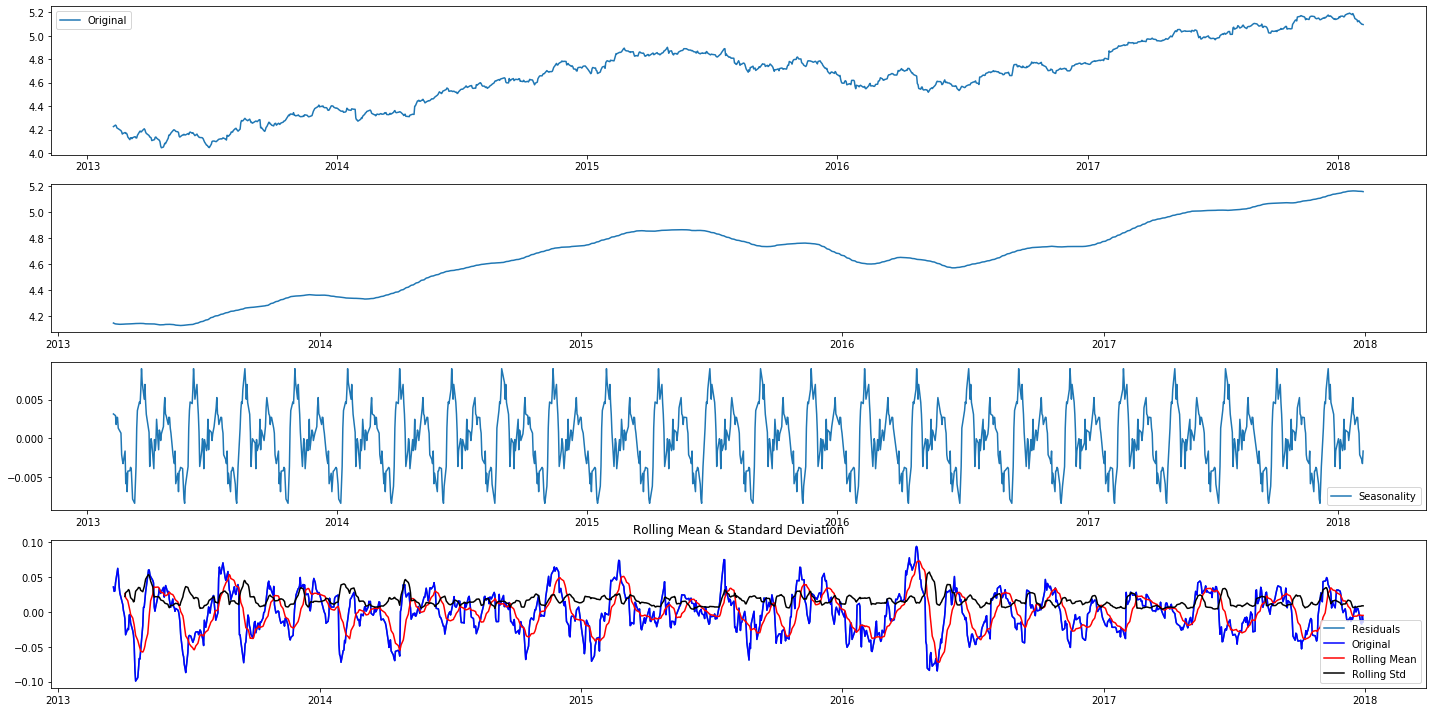

Results of Dickey Fuller Test:
Test Statistic                -9.888741e+00
p-value                        3.605098e-17
#Lags Used                     2.000000e+01
Number of Observations Used    1.186000e+03
Critical Value (1%)           -3.435876e+00
Critical Value (5%)           -2.863980e+00
Critical Value (10%)          -2.568069e+00
dtype: float64


In [31]:
decomposition = seasonal_decompose(apple_cols_high_logScale,freq = 52)

trend= decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(apple_cols_high_logScale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend,label = 'Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace= True)
test_stationarity(decomposedLogData)

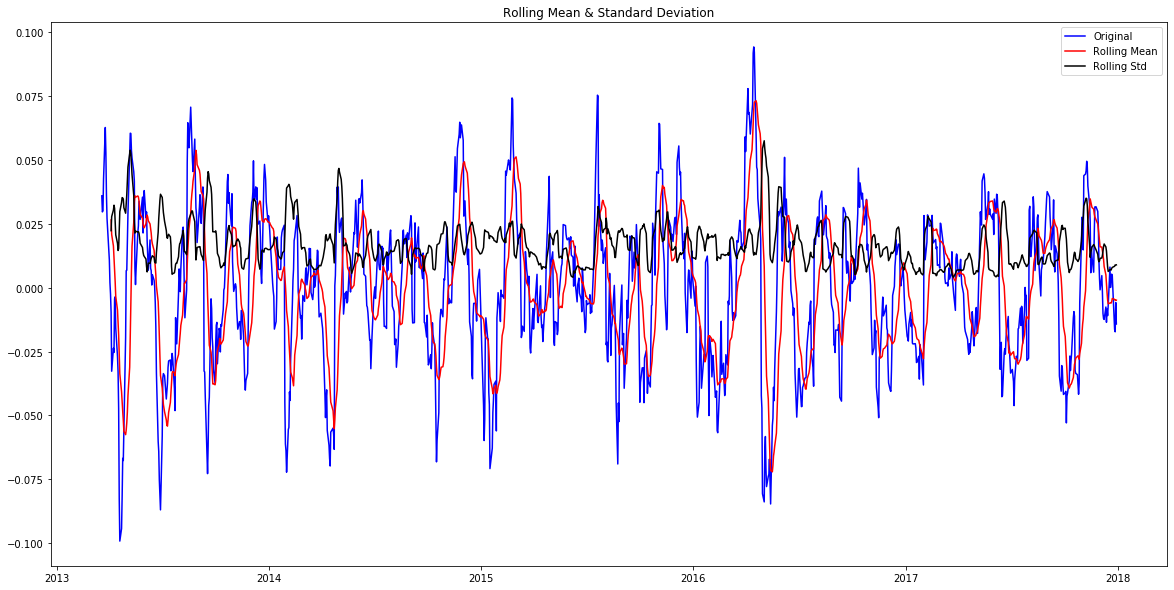

Results of Dickey Fuller Test:
Test Statistic                -9.888741e+00
p-value                        3.605098e-17
#Lags Used                     2.000000e+01
Number of Observations Used    1.186000e+03
Critical Value (1%)           -3.435876e+00
Critical Value (5%)           -2.863980e+00
Critical Value (10%)          -2.568069e+00
dtype: float64


In [32]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

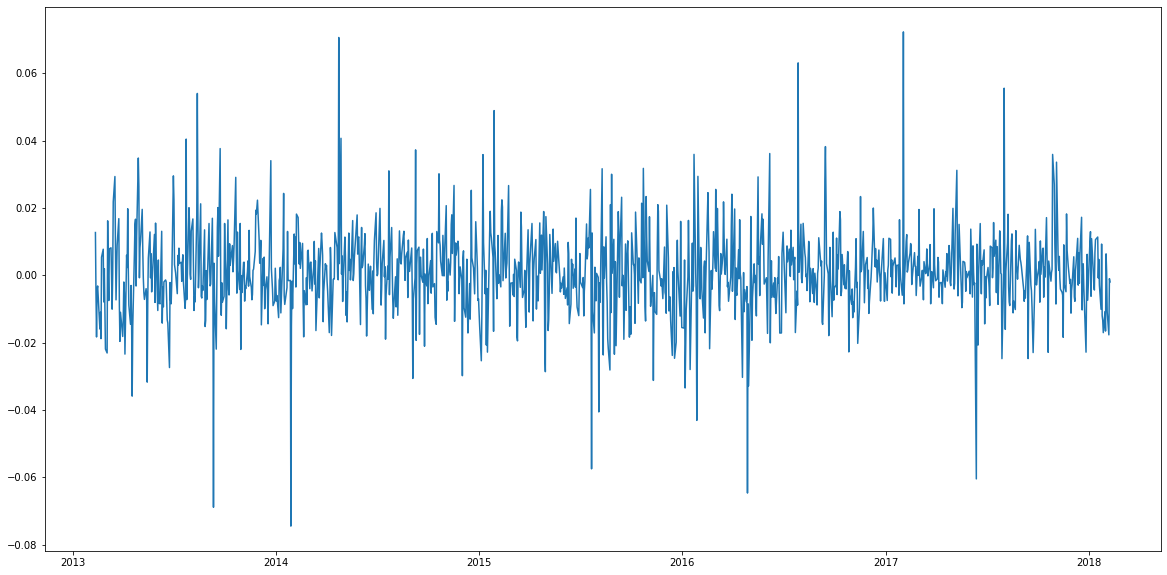

In [33]:
datasetLogDiffShifting = apple_cols_high_logScale - apple_cols_high_logScale.shift()
datasetLogDiffShifting.dropna(inplace =True)
plt.plot(datasetLogDiffShifting)

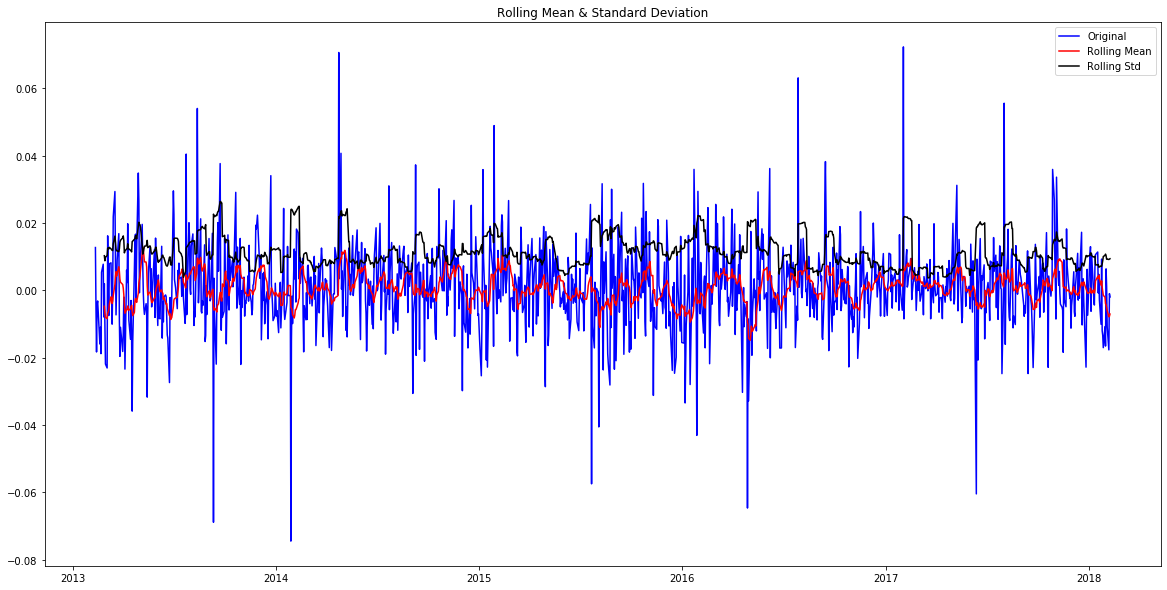

Results of Dickey Fuller Test:
Test Statistic                  -24.174599
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1256.000000
Critical Value (1%)              -3.435567
Critical Value (5%)              -2.863844
Critical Value (10%)             -2.567997
dtype: float64


In [34]:
test_stationarity(datasetLogDiffShifting)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


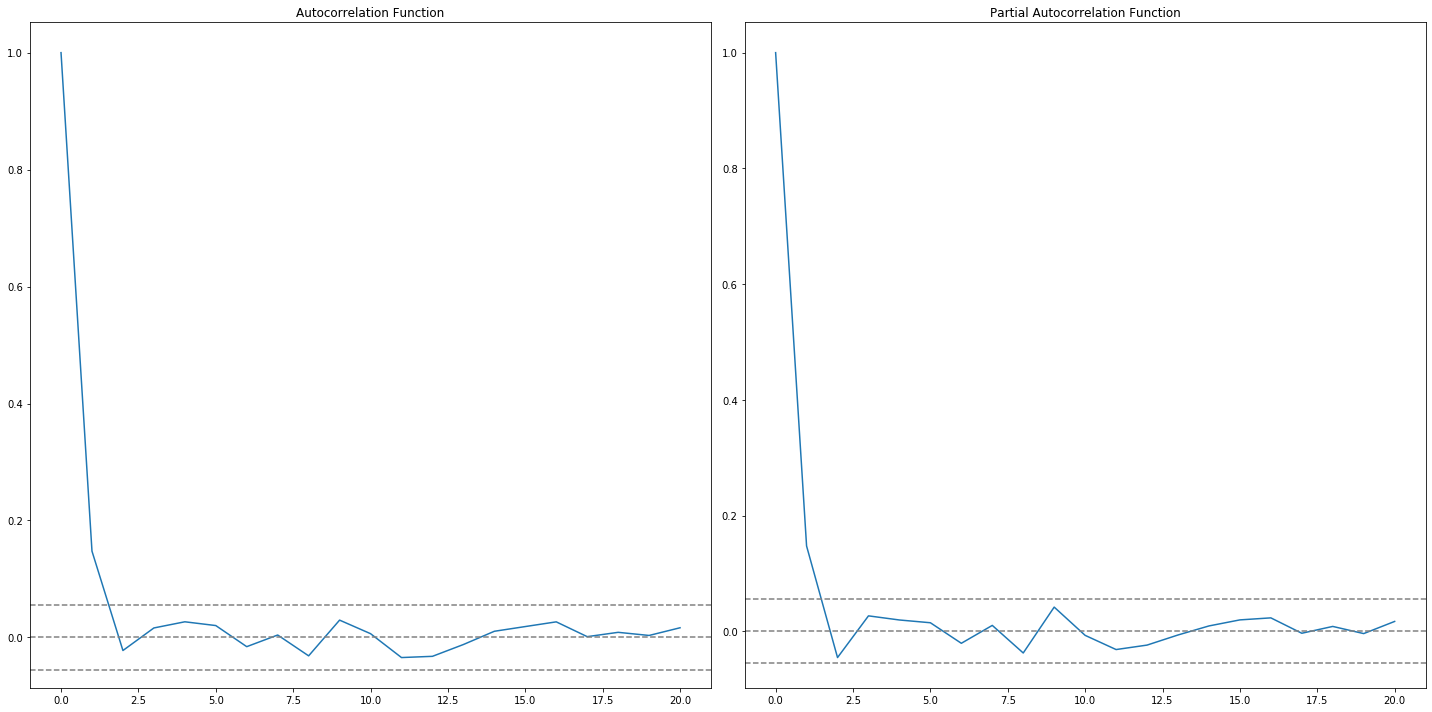

In [35]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')  

#Plot PACF 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA model


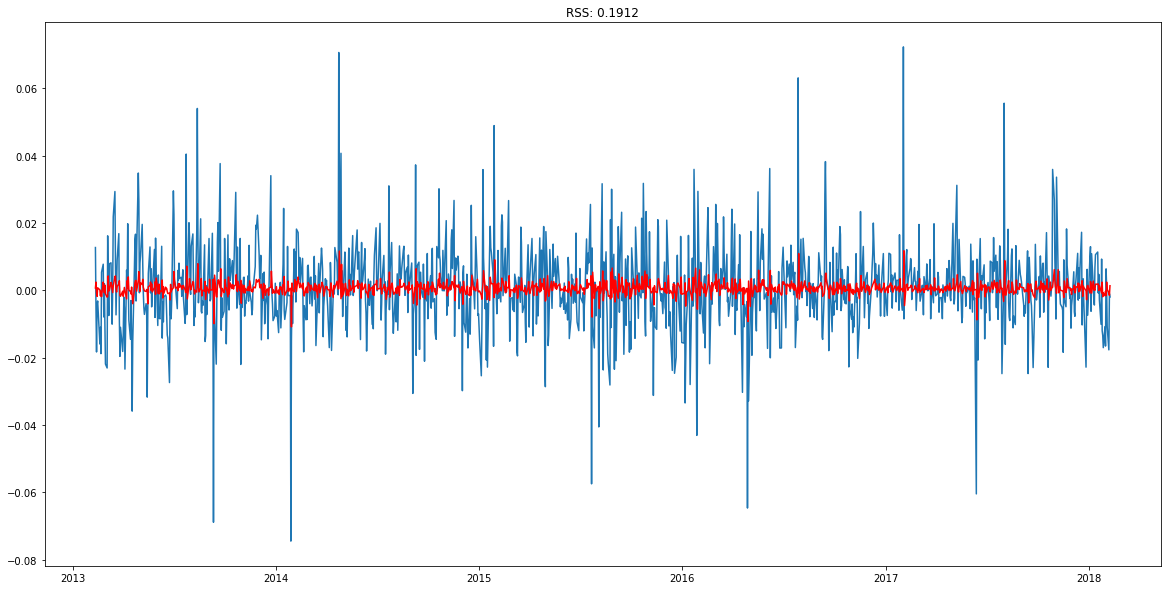

In [36]:
model = ARIMA(apple_cols_high_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['high'])**2))
print('Plotting ARIMA model')

In [37]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2013-02-11    0.000706
2013-02-12    0.002471
2013-02-13   -0.000820
2013-02-14   -0.001783
2013-02-15    0.000764
dtype: float64


In [38]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

date
2013-02-11    0.000706
2013-02-12    0.003177
2013-02-13    0.002358
2013-02-14    0.000575
2013-02-15    0.001339
                ...   
2018-02-01    0.881342
2018-02-02    0.881704
2018-02-05    0.880877
2018-02-06    0.879408
2018-02-07    0.880786
Length: 1258, dtype: float64


In [39]:
predictions_ARIMA_log = pd.Series(apple_cols_high_logScale['high'].iloc[0], index=apple_cols_high_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2013-02-08    4.225393
2013-02-11    4.226099
2013-02-12    4.228571
2013-02-13    4.227751
2013-02-14    4.225968
dtype: float64

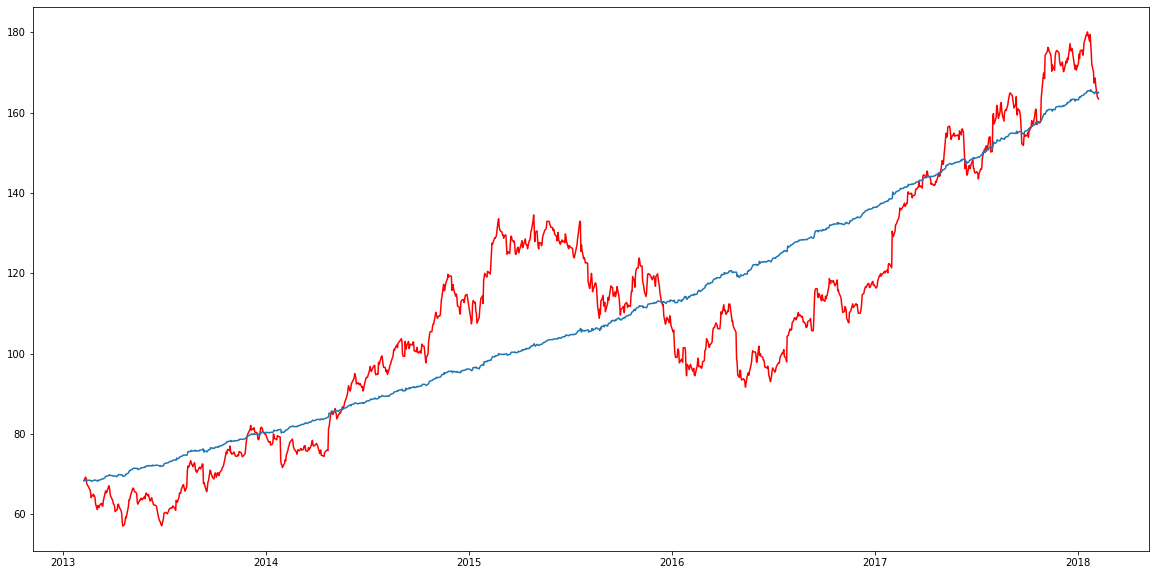

In [40]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(apple_cols_high,color = 'red')
plt.plot(predictions_ARIMA)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


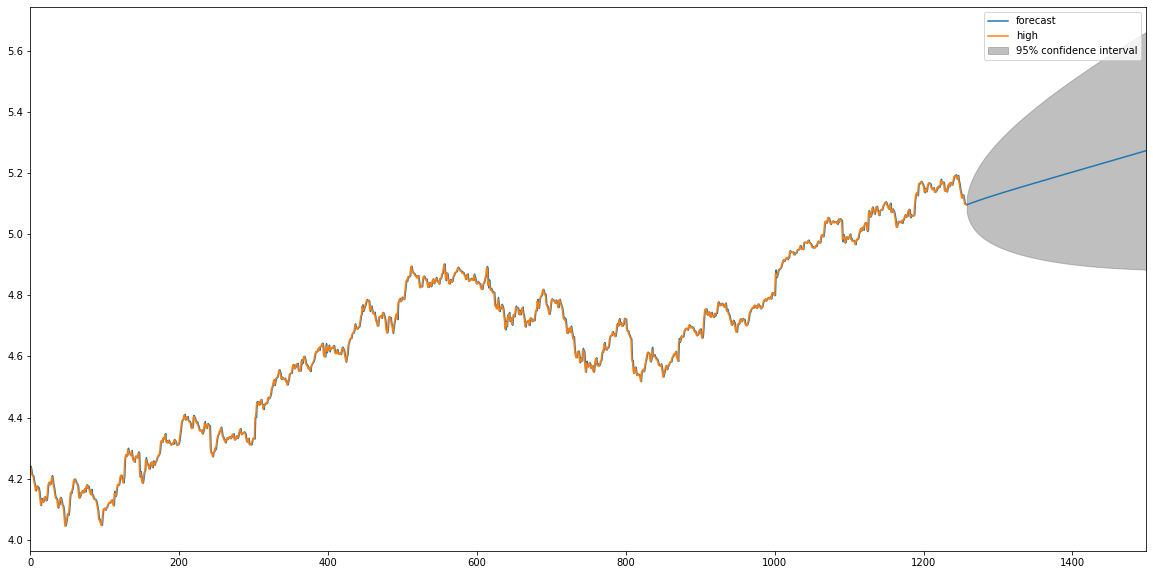

In [41]:
results_ARIMA.plot_predict(1,1500) 
x=results_ARIMA.forecast(steps=120)

In [42]:
apple_cols_high_logScale.shape

(1259, 1)